In [1]:
%matplotlib widget


## Regression

Exploring the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models.

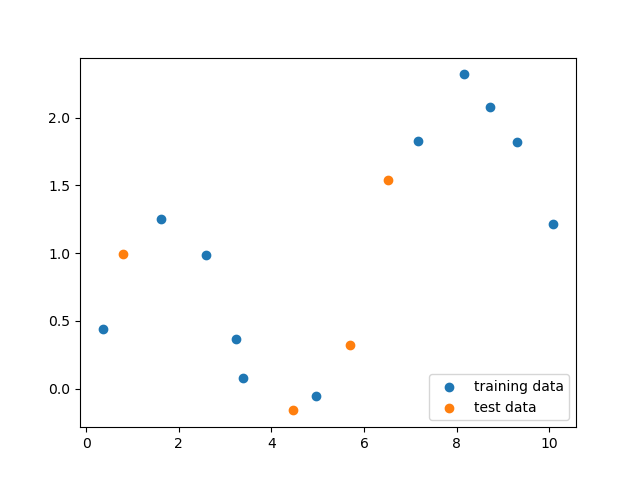

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);


Fitting polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9

In [3]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Reshaping for classifier
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
input_values = np.linspace(0, 10, 100).reshape(-1, 1)
    
degree_predictions = np.zeros((4,100))

# Testing for list of degrees
degree_list = [1, 3, 6, 9]
    
    
for i,degree in enumerate(degree_list):
    
    #Train classifier on specified degree
    poly_features= PolynomialFeatures(degree)
    X_poly_train = poly_features.fit_transform(X_train)
    
    
    clf = LinearRegression()
    clf.fit(X_poly_train, y_train)

    # Generate input values for prediction
    
    input_values_poly = poly_features.transform(input_values)

    # Predict outputs for the input values
    predicted_outputs = clf.predict(input_values_poly)

    degree_predictions[i,:] = predicted_outputs
    

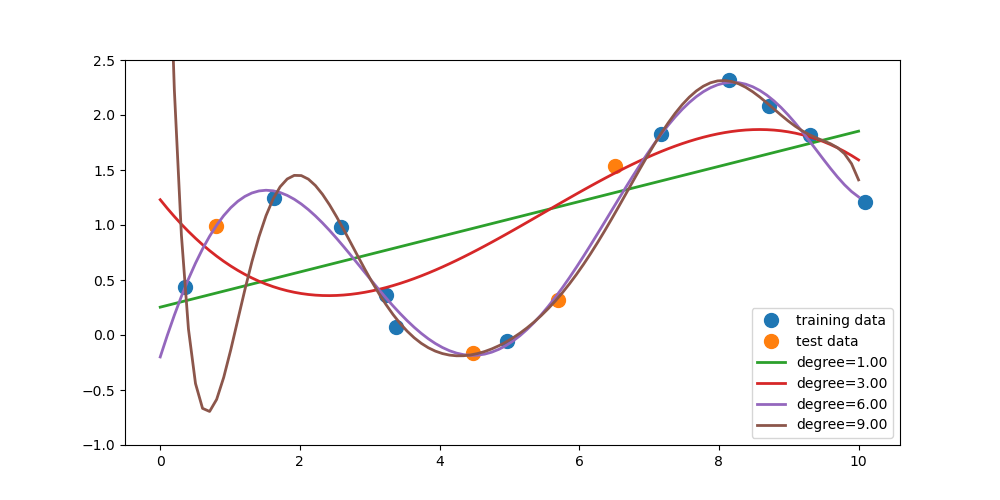

In [4]:


plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
for i,degree in enumerate(degree_list):
    plt.plot(np.linspace(0,10,100), degree_predictions[i], lw=2, label=f'degree={degree:.2f}')
plt.ylim(-1,2.5)
plt.legend(loc='lower right')


Fiting a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model computing the $R^2$ (coefficient of determination) regression

In [5]:

degree = list(range(10))
    
r2_train = np.array([])
r2_test = np.array([])
    
    
for i in range(len(degree)):
    poly_features= PolynomialFeatures(degree=degree[i])
        
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.fit_transform(X_test)
        
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
        
    r2_train = np.append(r2_train, model.score(X_poly_train, y_train))
    r2_test = np.append(r2_test, model.score(X_poly_test, y_test))       
        
print("R^2 of training models:")
for i, (train, test) in enumerate(zip(r2_train, r2_test)):
    print(f"Degree {i}: Train = {train:.2f}, Test = {test:.2f}")


R^2 of training models:
Degree 0: Train = 0.00, Test = -0.48
Degree 1: Train = 0.43, Test = -0.45
Degree 2: Train = 0.45, Test = -0.07
Degree 3: Train = 0.59, Test = 0.01
Degree 4: Train = 0.92, Test = 0.73
Degree 5: Train = 0.98, Test = 0.88
Degree 6: Train = 0.99, Test = 0.92
Degree 7: Train = 0.99, Test = 0.92
Degree 8: Train = 1.00, Test = 0.63
Degree 9: Train = 1.00, Test = -0.65


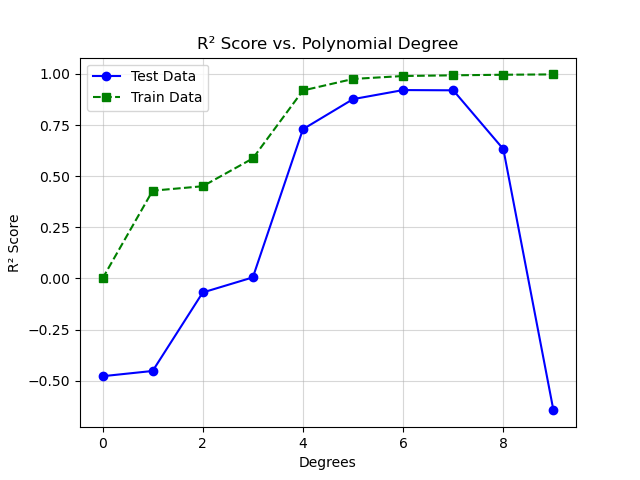

In [6]:
plt.clf

plt.figure()

# Plotting the data with customizations
plt.plot(list(range(10)), r2_test, marker='o', linestyle='-', color='blue', label='Test Data')
plt.plot(list(range(10)), r2_train, marker='s', linestyle='--', color='green', label='Train Data')

# Adding labels and legend
plt.xlabel("Degrees")
plt.ylabel("R² Score")
plt.title("R² Score vs. Polynomial Degree")
plt.legend()

# Adding gridlines
plt.grid(True, alpha=0.5)

plt.show()
    

A degree of 7 seems to the best model balance between underfitting and ovefitting

In [7]:
# Training 2 other regression models to compare results with:  A non-regularized LinearRegression model and a Lasso Regression model 
    
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
    
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score
    
scaler = MinMaxScaler()
    
poly_features= PolynomialFeatures(degree=12)
        
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)
        
clf_lr = LinearRegression()
clf_lr.fit(X_poly_train, y_train)
        
LinearRegression_R2_test_score = clf_lr.score(X_poly_test, y_test)
    
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.01, max_iter=10000, tol=0.1).fit(X_train_scaled, y_train)
    
Lasso_R2_test_score = linlasso.score(X_test_scaled, y_test)
    
print(f"Linear Regression R² Test Score: {LinearRegression_R2_test_score:.2f}")
print(f"Lasso Regression R² Test Score: {Lasso_R2_test_score:.2f}")
    

Linear Regression R² Test Score: -4.31
Lasso Regression R² Test Score: -0.43
